In [1]:
import os
import json

import pandas as pd
#df = pd.DataFrame(columns=['post', 'bound', 'index', 'label', 'pred', 'epsilon', 'p_safe_attack': 1.0, 'd_safe_attack': True, 'p_safe_bounds' , 'd_safe_bounds', 'beps', 'bdelt', 'balpha', 'iterations_attack', 'iterations_bounds', 'veri_time', 'attk_time'])
rows = []
def load(dataset, bound):
    entries = []
    path = "ExperimentalLogs/%s_%s.log"%(dataset, bound)
    with open(path) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entries.append(json.loads(line))
            entry = json.loads(line)
            #entry['Dataset'] = dataset
            #entry['Bound'] = bound
            entry['Dataset'] = dataset
            entry['Bound'] = bound
            entry['Method'] = 'Attack'
            entry['p_safe_bounds'] = entry['p_safe_attack']
            rows.append(entry)
            entry2 = json.loads(line)
            entry2['Dataset'] = dataset
            entry2['Bound'] = bound
            entry2['Method'] = 'Cert'
            entry2['p_safe_attack'] = entry2['p_safe_bounds']
            rows.append(entry2)
    return entries

log_info = load("boston1", "chernoff")
log_info = load("concrete1", "chernoff")
log_info = load("yacht1", "chernoff")
log_info = load("powerplant1", "chernoff")
log_info = load("energy1", "chernoff")
log_info = load("kin8nm1", "chernoff")
log_info = load("naval1", "chernoff")
log_info = load("wine1", "chernoff")

In [2]:
df = pd.DataFrame.from_dict(rows, orient='columns')
df.head()

,index,label,pred,epsilon,p_safe_attack,d_safe_attack,p_safe_bounds,d_safe_bounds,beps,bdelt,balpha,iterations_attack,iterations_bounds,veri_time,attk_time,Dataset,Bound,Method
0,0,21.551691,21.526541,0.01,1.00000,True,1.00000,True,0.05,0.1,0.05,151.0,151.0,0.589912,14.095203,boston1,chernoff,Attack
1,0,21.551691,21.526541,0.01,0.81457,True,0.81457,True,0.05,0.1,0.05,151.0,151.0,0.589912,14.095203,boston1,chernoff,Cert
2,1,27.039705,27.060947,0.01,1.00000,True,1.00000,True,0.05,0.1,0.05,151.0,151.0,0.681588,16.336607,boston1,chernoff,Attack
3,1,27.039705,27.060947,0.01,1.00000,True,1.00000,True,0.05,0.1,0.05,151.0,151.0,0.681588,16.336607,boston1,chernoff,Cert
4,2,42.760319,42.766071,0.01,1.00000,True,1.00000,True,0.05,0.1,0.05,151.0,151.0,0.701659,15.625894,boston1,chernoff,Attack


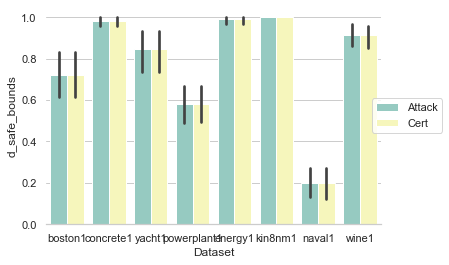

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.barplot(x="Dataset", y="d_safe_bounds", hue="Method",
                 data=df, palette="Set3")


sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()